## Data-Driven RTcmix LEVEL TWO
### More methods for indirect sonification with dynamics beyond beeps
In n04: <br>
(1) Beeps sampled in time (with time-varying emphasis) <br>
(2) Beeps sampled in frequency (notepicker) <br>
(3) Chord Swells <br>
(4) Chord Sweeps <br>
In n09 (this notebook): <br>
(5) Additive Resynthesis <br>
(6) FM Synthesis <br>
**(7) Granular Synthesis** <br>

In [8]:
# import what you need ! 

import sys
sys.path.append('../modules/')

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import subprocess as sp
from subprocess import Popen
import os

from scipy.io import wavfile
import scipy.io

# our modules: 
import notepicker
#import makeDataChord_v2 as mDc # read in below. 
import writeCmixSco_GRAN_v2 as wRT_gran
import writeCmixSco_WT_ac as wRT_wt
# _ac stands for autocheck

%matplotlib inline

# ======================================================
# autocheck for your RTcmix installation type: 
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")
# ======================================================

%matplotlib inline

CMIX found.


In [3]:
print(os.listdir(os.path.abspath('../data/breathalyzer/')))

['y2020-02-13_tsawi0_37s.pkl', 'y2020-02-13_chris0_37s.pkl', 'y2020-02-13_David2_37s.pkl', 'BA_ben_1.pkl', 'y2020-02-13_anna1_37s.pkl']


      hum  temp_C  time_s
0  28.922   25.13  0.0000
1  28.854   25.12  0.3852
2  28.786   25.12  0.7701
3  28.686   25.14  1.1554
4  28.626   25.24  1.5403


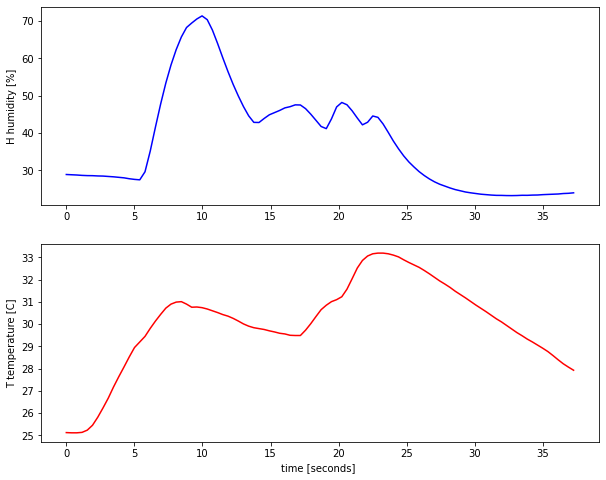

In [4]:
# READ IN THE DATA FILE ! ! !
#datafilename = '../data/breathalyzer/BA_ben_1.pkl'  
datafilename = '../data/breathalyzer/y2020-02-13_anna1_37s.pkl'      

breath = pd.read_pickle(datafilename) # np.loadtxt(datafilename)
print(breath[0:5])
time = breath.time_s
p1 = temp_C = breath.temp_C
p2 = humidity = breath.hum

# put the data into a dictionary: 
# (very useful, but we will also work with pandas)
data_dict = {}
data_dict['time_o'] = time  # the _o indicates these are the original values, un-re-sampled
data_dict['p1_o'] = p1

# PLOT THE DATA AS CURVES... 
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(time,humidity,'b-')
#plt.xlabel('time')
plt.ylabel('H humidity [%]')

plt.subplot(2,1,2)
plt.plot(time,temp_C,'r-')
plt.xlabel('time [seconds] ')
plt.ylabel('T temperature [C]')

plt.show()

## (7) Granular Synthesis: The gransynth instrument ! 

http://rtcmix.org/reference/instruments/GRANSYNTH.php

PITCH  <br>
using RTcmix linear octaves ! <br>
http://sites.music.columbia.edu/cmc/RTcmix/docs/scorefile/cpsoct.html <br>

Linear octaves are similar to octave.pitch-class (oct.pc) notation in that 8.00 is middle C, 
9.00 is the C an octave above, etc. The difference is that the fractional part of the specification 
represents a direct mapping onto the notes of the scale between octaves. For example, in oct.pc notation 
the value 8.06 represents F-sharp (the tritone, 1/2 the chromatic scale between 8.00 and 9.00). 
This would be represented as 8.5 in linear octaves. 

Text(0, 0.5, 'amplitude [units?]')

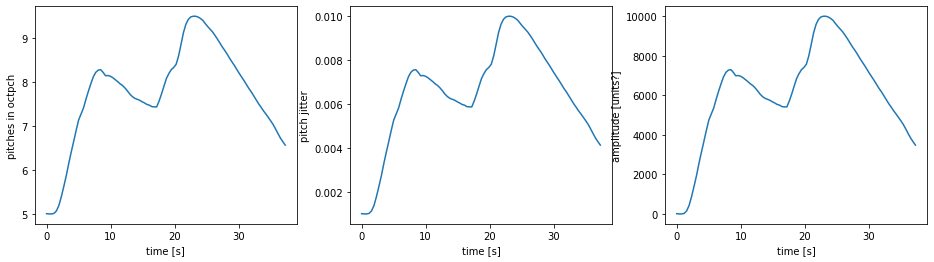

In [5]:


# FREQUENCIES
# in 
root_freq = 5.0 # what is the lowest value it can have?
peak_freq = 9.5
p1_scl = np.interp(p1,[min(p1),max(p1)],[root_freq,peak_freq])

# AMPLITUDE
# absolute amplitude (16-bit, 0-32768)
amp_range = [0,10000]
amp = np.interp(p1,[min(p1),max(p1)],amp_range)

# PITCHJITTER
# p13 ("PITCHJITTER") sets the maximum randomly determined amount to add or subtract from the current pitch (in linear octaves).
#pitchjtr_range = [0.001,0.01]
#pitchjtr = np.interp(p1,[min(p1),max(p1)],pitchjtr_range)
pitchjtr_range = [0.001,0.01]
#pitchjtr = 1/np.interp(p1,[min(p1),max(p1)],pitchjtr_range)/100000
pitchjtr = np.interp(p1,[min(p1),max(p1)],pitchjtr_range)

# --======================--
# plotting
# --======================--
plt.figure(figsize=[16,4])

plt.subplot(1,3,1)
plt.plot(time,p1_scl)
plt.xlabel('time [s]')
plt.ylabel('pitches in octpch')

plt.subplot(1,3,2)
plt.plot(time,pitchjtr)
plt.xlabel('time [s]')
plt.ylabel('pitch jitter')

plt.subplot(1,3,3)
plt.plot(time,amp)
plt.xlabel('time [s]')
plt.ylabel('amplitude [units?]')


In [6]:
#create RTcmix score
reload(wRT_gran)

tones_dict = {}
#cmixInstalled variable can also be passed to the writeCmixSco module directly from the notebook
tones_dict['cmixInstalled'] = cmixInstalled
tones_dict['base_name'] = 'test_GRANSYNTH_v1_pitchjitVAR'
tones_dict['dur_sound'] = 16

# time series: 
tones_dict['p1'] = p1_scl
tones_dict['amplitude'] = amp # = np.array([7000])
# add pitchjitter
tones_dict['pitchjitter'] = pitchjtr # np.array([2.0]) # 

# single, constant values
#tones_dict['pitchjitter'] = 2.0 
# VERY sensitive to this parameter ! 
# the larger the number the LESS smooth it is.. 0.5 makes beeps !! 
# but so does a very small number: 0.0001  ! 
# 0.001 seems to give a smooth tone
tones_dict['hopjitter'] = 0.001

wRT_gran.writeCmixSco_GRAN(tones_dict)

dur = 16

99
Amplitude is time varying (p-field)
99
Pitchjitter is time varying (p-field)
CMIX found.
rtoutput("test_GRANSYNTH_v1_pitchjitVAR.wav")

RTcmix score created.


In [9]:
#play RTcmix score and create a wave file
#use CMIX if installed; if not, use pyGoRTcmix

scorefilename = tones_dict['base_name'] + '.sco'
soundfilename = tones_dict['base_name'] + '.wav'

if cmixInstalled:
    cmix_cmd = 'CMIX < ' + scorefilename
else:
    cmix_duration = str(tones_dict['dur_sound'])
    cmix_cmd = '../pyGoRTcmix/pyGoRTcmix -inputscore ' + os.path.abspath(tones_dict['base_name'] + '.sco ') + '-output ' + os.path.abspath(tones_dict['base_name'] + '.wav ') +'-dur ' + cmix_duration
print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
print('\nhopefully i just wrote your sound file (' + tones_dict['base_name'] + '.wav); is it here?')
! ls *.wav


CMIX < test_GRANSYNTH_v1_pitchjitVAR.sco

hopefully i just wrote your sound file (test_GRANSYNTH_v1_pitchjitVAR.wav); is it here?
L_Temp.wav  R_Temp.wav	stereo.wav  test_GRANSYNTH_v1_pitchjitVAR.wav


In [11]:
# sr = samplerate
# y = data
sr, y = wavfile.read(soundfilename)
print(np.shape(y))
# if this is stereo sound, select which track you want to look at.. 

(706048,)


/home/ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: WavFileWarning: Reached EOF prematurely; finished at 1412916 bytes, expected 1412920 bytes from header.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/ben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


Text(0, 0.5, 'dB')

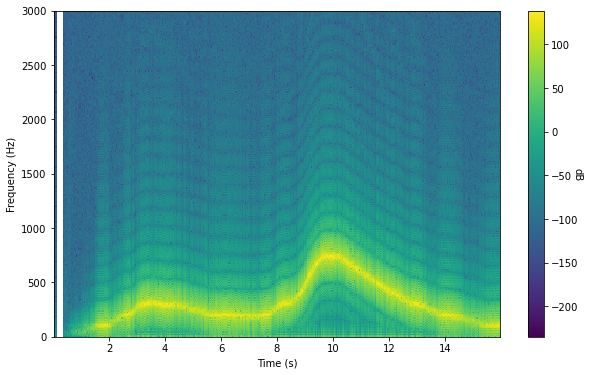

In [13]:
from scipy import signal as spsig

# Compute the spectrogram
NfftSTFT = 4096 # The number of frequency points for the FFT of each frame
SliceLength = int(0.05*sr) # The length of each frame (should be expressed in samples)
Overlap = int(SliceLength/4) # The overlapping between successive frames (should be expressed in samples)
[fSTFT, tSTFT, STFT] = spsig.spectrogram(y, fs=sr, nperseg=SliceLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!

# Plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0, 3000]) #sr/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)